In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [380]:
df = pd.read_csv('cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [381]:
df = df.drop('Unnamed: 0', axis=1)

In [382]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.7+ MB


In [384]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [385]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [386]:
df.shape

(26967, 10)

In [387]:
dups= df.duplicated()
print(dups.sum())

34


In [388]:
df.drop_duplicates(inplace=True)
dups= df.duplicated()
print(dups.sum())

0


# ## Performing Univariate and Bivariate Analysis


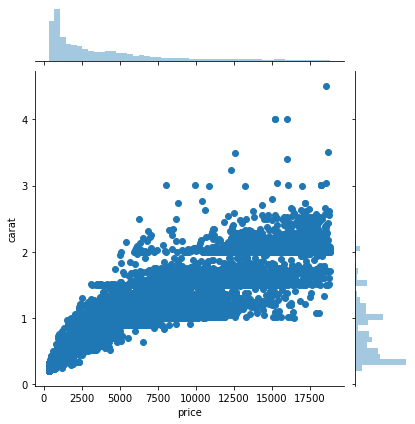

In [389]:
sns.jointplot(df['price'], df['carat'])

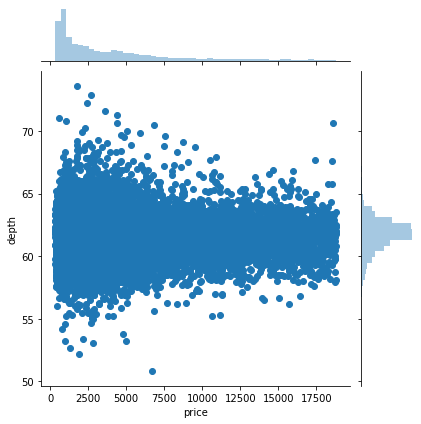

In [390]:
sns.jointplot(df['price'], df['depth'])

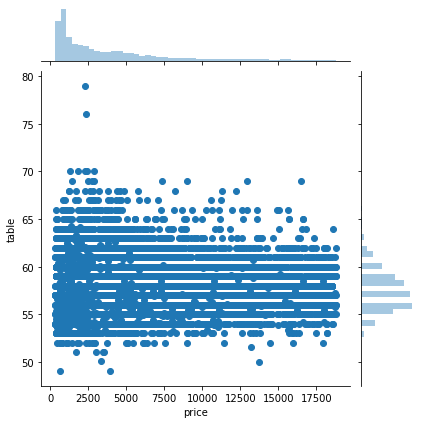

In [391]:
sns.jointplot(df['price'], df['table'])

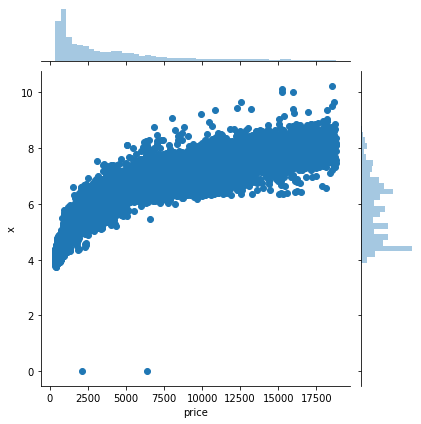

In [392]:
sns.jointplot(df['price'], df['x'])

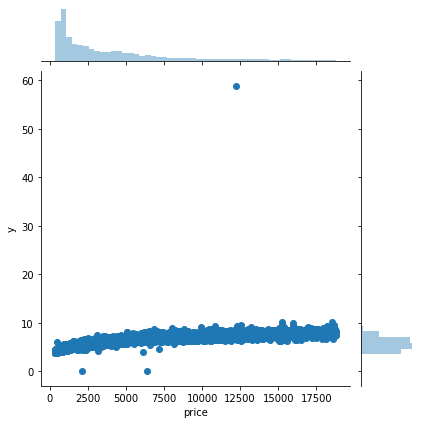

In [393]:
sns.jointplot(df['price'], df['y'])

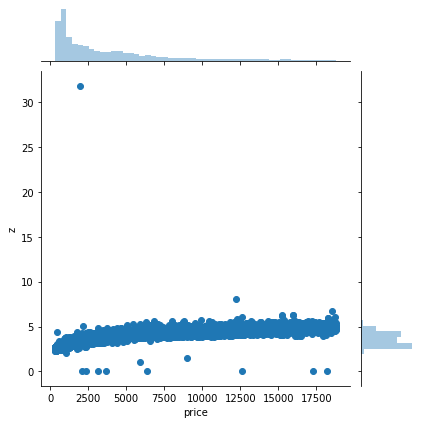

In [394]:
sns.jointplot(df['price'], df['z'])

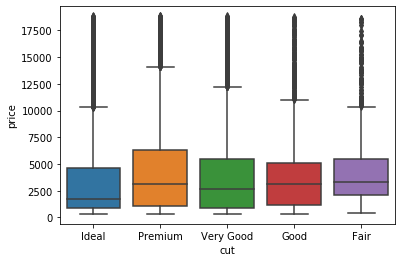

In [395]:
sns.boxplot(df['cut'], df['price'])

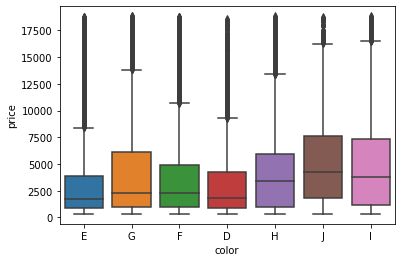

In [396]:
sns.boxplot(df['color'], df['price'])

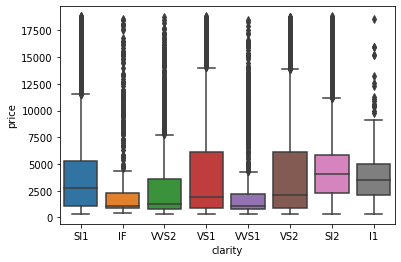

In [397]:
sns.boxplot(df['clarity'], df['price'])

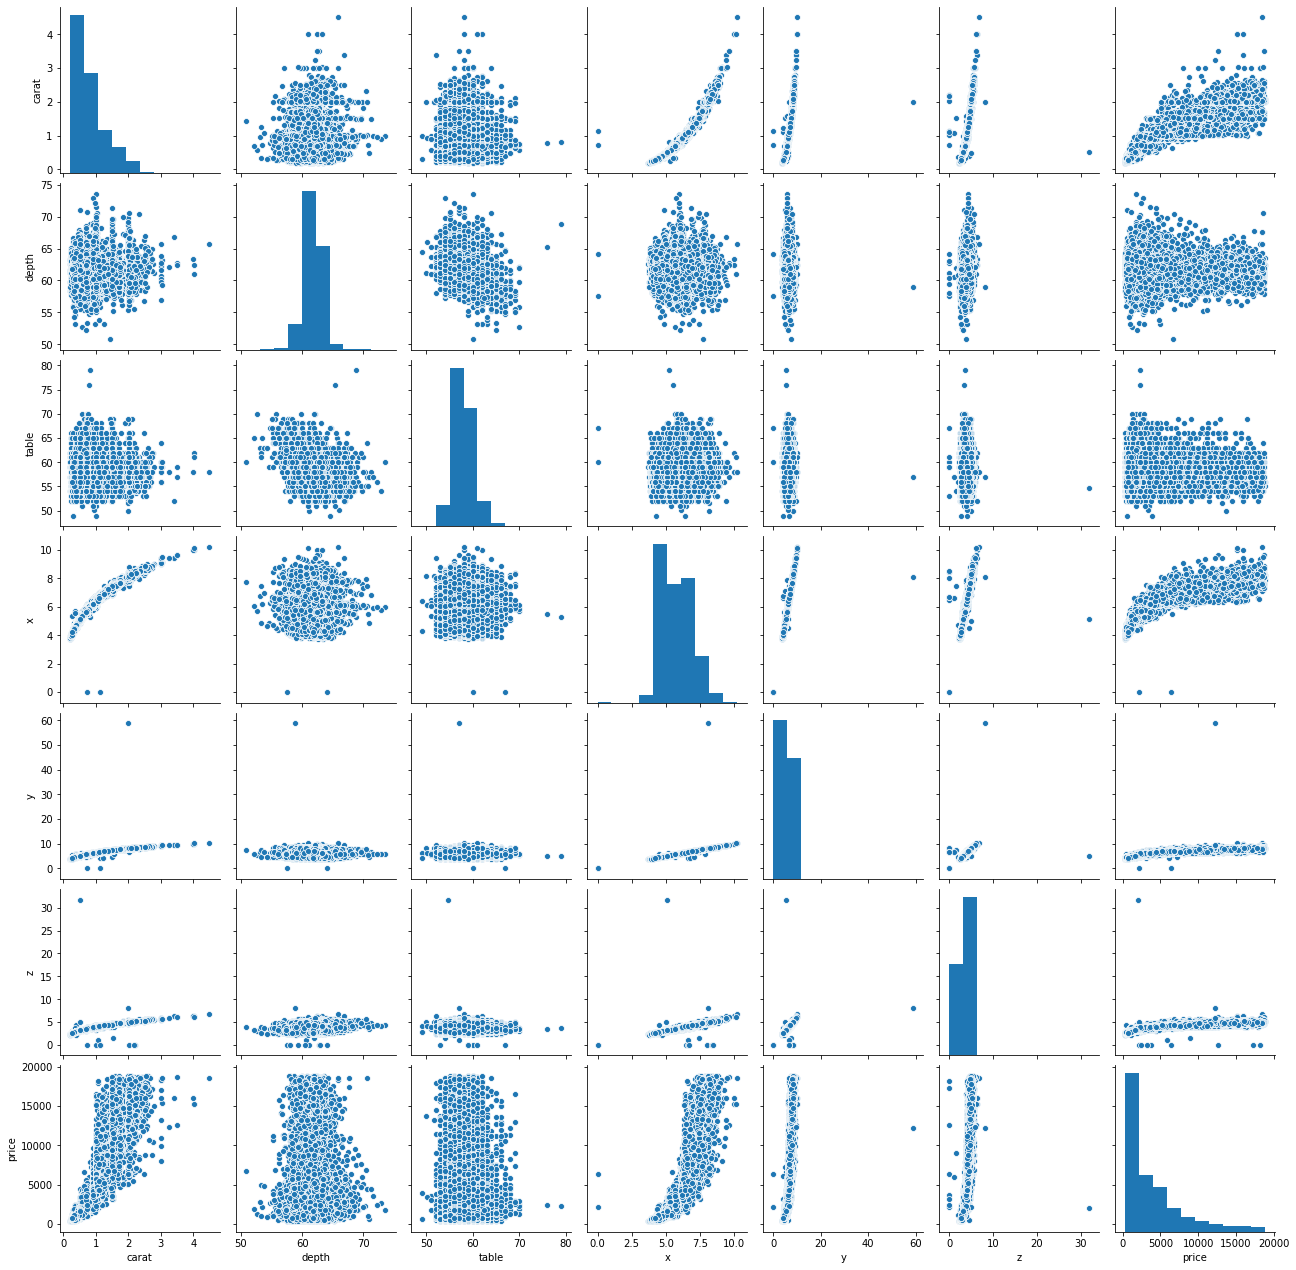

In [398]:
sns.pairplot(df)

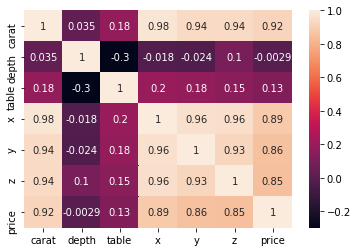

In [399]:
sns.heatmap(df.corr(),annot=True)

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [434]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [435]:
df_new= df.replace('', np.nan)

In [436]:
df_new[df_new.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [437]:
median1= df_new["depth"].median()
df_new["depth"].replace(np.nan, median1, inplace=True)

In [438]:
df_new.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [439]:
(df_new !=0).all()

carat       True
cut         True
color       True
clarity     True
depth       True
table       True
x          False
y          False
z          False
price       True
dtype: bool

In [440]:
Zero_rows = df_new.loc[~(df_new != 0).all(axis=1)]
Zero_rows

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [441]:
df_new = df_new[df_new!=0].dropna()

In [442]:
Zero_rows = df_new.loc[~(df_new != 0).all(axis=1)]
Zero_rows

,carat,cut,color,clarity,depth,table,x,y,z,price


In [443]:
df_new.shape

(26925, 10)

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

# ## Converting Object data type coloumns into continuous datatype with help of encoding libraries and dummy variables

In [444]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_new['cut1'] = labelencoder.fit_transform(df_new.cut)

In [445]:
df_new['cut1'].value_counts()

2    10805
3     6880
4     6027
1     2434
0      779
Name: cut1, dtype: int64

In [446]:
df_new_dummies = pd.get_dummies(df_new, prefix= ['color', 'clarity'], columns=['color', 'clarity'])
df_new_dummies.head()

,carat,cut,depth,table,x,y,z,price,cut1,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,Ideal,62.1,58.0,4.27,4.29,2.66,499,2,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,Premium,60.8,58.0,4.42,4.46,2.70,984,3,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,Very Good,62.2,60.0,6.04,6.12,3.78,6289,4,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,Ideal,61.6,56.0,4.82,4.80,2.96,1082,2,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,Ideal,60.4,59.0,4.35,4.43,2.65,779,2,0,...,0,0,0,0,0,0,0,0,1,0


In [447]:
df_new_dummies.drop('cut', axis=1, inplace=True)
df_new_dummies.head()

,carat,depth,table,x,y,z,price,cut1,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,2,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,4,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [448]:
X = df_new_dummies.drop('price', axis=1)
Y = df_new_dummies[['price']]

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [450]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3752607935875556
The coefficient for depth is -0.03729142898609106
The coefficient for table is -0.03435232764768614
The coefficient for x is -0.31679342641317726
The coefficient for y is -0.0025599659336305314
The coefficient for z is -0.009018400410559735
The coefficient for cut1 is 0.008964554457723862
The coefficient for color_D is -592450907027.0989
The coefficient for color_E is -696893295319.8518
The coefficient for color_F is -685707740688.6145
The coefficient for color_G is -733735637264.4255
The coefficient for color_H is -647223424929.6687
The coefficient for color_I is -546799885210.75836
The coefficient for color_J is -404660346962.7664
The coefficient for clarity_I1 is -156166859550.96027
The coefficient for clarity_IF is -245597394107.93286
The coefficient for clarity_SI1 is -584760935301.8708
The coefficient for clarity_SI2 is -509739723888.2282
The coefficient for clarity_VS1 is -486725350455.73444
The coefficient for clarity_VS2 is -5654

In [451]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.390233089835748e-05


In [452]:
regression_model.score(X_train_scaled, y_train_scaled)

0.919605337977621

In [453]:
regression_model.score(X_test_scaled, y_test_scaled)

-3.7116723045755814e+20

In [454]:
Predicted_train = regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled, Predicted_train))

0.2835368731538662

In [455]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut1,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,0.637015,1.110553,-0.647094,0.712919,0.716267,0.843231,-1.519389,-0.375037,2.112183,-0.461647,...,-0.23721,-0.116647,-0.187335,-0.571816,2.209601,-0.422786,-0.536719,-0.26846,-0.321643,0.033961
12108,0.447523,1.611797,-0.647094,0.507886,0.546656,0.718862,1.410816,2.666407,-0.473444,-0.461647,...,-0.23721,-0.116647,-0.187335,-0.571816,2.209601,-0.422786,-0.536719,-0.26846,-0.321643,0.308658
20181,-0.268336,-0.751211,1.769436,-0.116130,-0.080904,-0.179356,-1.519389,-0.375037,-0.473444,-0.461647,...,-0.23721,-0.116647,-0.187335,-0.571816,-0.452570,-0.422786,1.863172,-0.26846,-0.321643,-0.554103
4712,-0.078844,-2.899400,2.485444,0.285023,0.198954,-0.096444,-1.519389,-0.375037,-0.473444,-0.461647,...,-0.23721,-0.116647,-0.187335,1.748815,-0.452570,-0.422786,-0.536719,-0.26846,-0.321643,-0.369725
2548,0.447523,0.752522,0.695423,0.570287,0.512734,0.622131,0.434081,-0.375037,-0.473444,-0.461647,...,-0.23721,-0.116647,-0.187335,-0.571816,-0.452570,2.365264,-0.536719,-0.26846,-0.321643,0.670927


In [456]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut1', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [457]:
expr = 'price ~ carat + depth + table + x + y + z + cut1 + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [458]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       1.084202e-17
carat           1.375522e+00
depth          -3.761713e-02
table          -3.428650e-02
x              -3.167043e-01
y              -2.129054e-03
z              -9.482169e-03
cut1            8.609569e-03
color_D         5.218136e-02
color_E         4.216440e-02
color_F         3.483552e-02
color_G         1.661432e-02
color_H        -3.145441e-02
color_I        -6.814384e-02
color_J        -9.577763e-02
clarity_I1     -1.144423e-01
clarity_IF      5.884790e-02
clarity_SI1    -3.834308e-02
clarity_SI2    -1.255856e-01
clarity_VS1     5.097603e-02
clarity_VS2     2.812517e-02
clarity_VVS1    6.285504e-02
clarity_VVS2    7.023869e-02
dtype: float64

In [459]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:25:36   Log-Likelihood:                -2987.6
No. Observations:               18847   AIC:                             6017.
Df Residuals:                   18826   BIC:                             6182.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.084e-17      0.002   5.25e-15   

In [460]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse


0.08039190896204716

In [461]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2835346697708186

In [462]:
np.sqrt(lm1.mse_resid) #another way

0.283692764122703

In [463]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

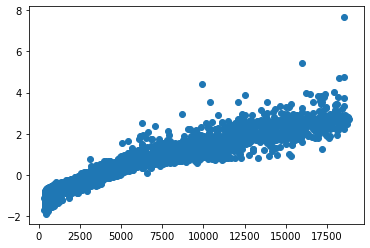

In [464]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [465]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.38) * carat + (-0.04) * depth + (-0.03) * table + (-0.32) * x + (-0.0) * y + (-0.01) * z + (0.01) * cut1 + (0.05) * color_D + (0.04) * color_E + (0.03) * color_F + (0.02) * color_G + (-0.03) * color_H + (-0.07) * color_I + (-0.1) * color_J + (-0.11) * clarity_I1 + (0.06) * clarity_IF + (-0.04) * clarity_SI1 + (-0.13) * clarity_SI2 + (0.05) * clarity_VS1 + (0.03) * clarity_VS2 + (0.06) * clarity_VVS1 + (0.07) * clarity_VVS2 + 

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [324]:
DF= pd.read_csv('Holiday_Package.csv')

In [325]:
DF.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [326]:
DF.drop('Unnamed: 0', axis=1, inplace=True)
DF.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [327]:
DF.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [328]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 40.9+ KB


In [329]:
DF.shape

(872, 7)

In [330]:
DF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
dups= DF.duplicated()
print(dups.sum())


0


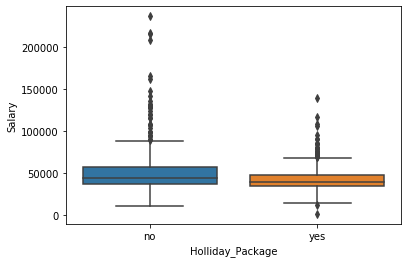

In [332]:
sns.boxplot(DF['Holliday_Package'], DF['Salary']) 

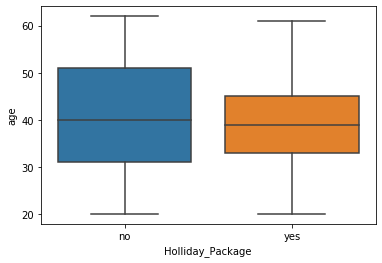

In [333]:
sns.boxplot(DF['Holliday_Package'], DF['age'])

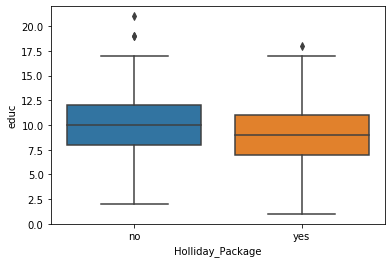

In [334]:
sns.boxplot(DF['Holliday_Package'], DF['educ'])

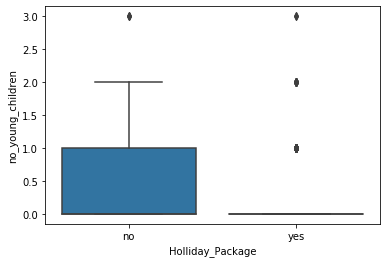

In [335]:
sns.boxplot(DF['Holliday_Package'], DF['no_young_children'])

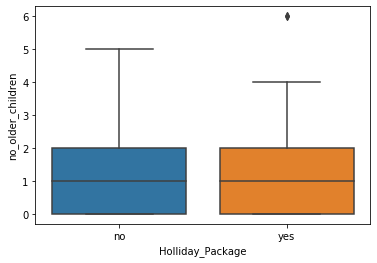

In [336]:
sns.boxplot(DF['Holliday_Package'], DF['no_older_children'])

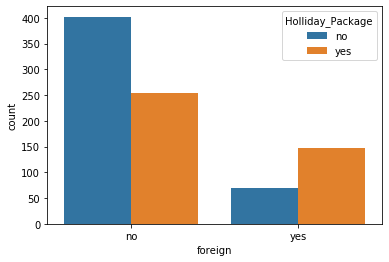

In [337]:
sns.countplot(DF['foreign'],hue=DF['Holliday_Package'])

# # 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [338]:
DF_new_dummies = pd.get_dummies(DF, prefix= ['For'], columns=['foreign'])
DF_new_dummies.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,For_no,For_yes
0,no,48412,30,8,1,1,1,0
1,yes,37207,45,8,0,1,1,0
2,no,58022,46,9,0,0,1,0
3,no,66503,31,11,2,0,1,0
4,no,66734,44,12,0,2,1,0


In [339]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
DF_new_dummies['HP1'] = labelencoder.fit_transform(DF_new_dummies.Holliday_Package)

In [340]:
DF_new_dummies['HP1'].value_counts()

0    471
1    401
Name: HP1, dtype: int64

In [341]:
DF_new_dummies.drop('Holliday_Package', axis=1, inplace=True)
DF_new_dummies.head()

,Salary,age,educ,no_young_children,no_older_children,For_no,For_yes,HP1
0,48412,30,8,1,1,1,0,0
1,37207,45,8,0,1,1,0,1
2,58022,46,9,0,0,1,0,0
3,66503,31,11,2,0,1,0,0
4,66734,44,12,0,2,1,0,0


# LDA Model

In [342]:
X = DF_new_dummies.drop('HP1', axis=1)
X = np.asmatrix(X)

y = np.asarray(DF_new_dummies[['HP1']])

In [343]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [344]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)


C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [345]:
pred_class = model.predict(X_train)


In [346]:
confusion_matrix(Y_train, pred_class)

array([[252,  74],
       [126, 158]], dtype=int64)

In [347]:
model.score(X_train, Y_train)

0.6721311475409836

In [348]:
print(classification_report(Y_train, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [349]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_test,Y_test)

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [350]:
pred_class = model.predict(X_test)


In [351]:
confusion_matrix(Y_test, pred_class)

array([[103,  42],
       [ 52,  65]], dtype=int64)

In [352]:
model.score(X_test, Y_test)

0.6412213740458015

In [353]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



# Apply Logistic regression model

In [354]:
X1 = DF_new_dummies.drop('HP1', axis=1)

Y1 = DF_new_dummies[['HP1']]

In [355]:
X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, test_size=0.30, random_state=1)

In [356]:
model= LogisticRegression()
model.fit(X1_train, Y1_train)
model.fit(X1_test, Y1_test)

C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HARSH\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
Y1_train_perdict = model.predict(X1_train)
Y1_test_perdict = model.predict(X1_test)

In [358]:
model.score(X1_train, Y1_train)


0.5098360655737705

In [359]:
model.score(X1_test, Y1_test)

0.549618320610687

In [360]:
confusion_matrix(Y1_train, Y1_train_perdict )

array([[256,  70],
       [229,  55]], dtype=int64)

In [361]:
print(classification_report(Y1_train, Y1_train_perdict))

              precision    recall  f1-score   support

           0       0.53      0.79      0.63       326
           1       0.44      0.19      0.27       284

    accuracy                           0.51       610
   macro avg       0.48      0.49      0.45       610
weighted avg       0.49      0.51      0.46       610



In [362]:
confusion_matrix(Y1_test, Y1_test_perdict )

array([[114,  31],
       [ 87,  30]], dtype=int64)

In [363]:
print(classification_report(Y1_test, Y1_test_perdict))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       145
           1       0.49      0.26      0.34       117

    accuracy                           0.55       262
   macro avg       0.53      0.52      0.50       262
weighted avg       0.53      0.55      0.52       262



In [364]:
# for getting the predicted classes and probs
Y1_test_perdict_prob= model.predict_proba(X1_test)
pd.DataFrame(Y1_test_perdict_prob).head()

,0,1
0,0.724059,0.275941
1,0.487429,0.512571
2,0.600398,0.399602
3,0.863527,0.136473
4,0.468405,0.531595


In [365]:
Y1_train_perdict_prob= model.predict_proba(X1_train)
pd.DataFrame(Y1_train_perdict_prob).head()

,0,1
0,0.442074,0.557926
1,0.565845,0.434155
2,0.883175,0.116825
3,0.643685,0.356315
4,0.450560,0.549440


In [366]:
#AUC and ROC for training data
Probs = model.predict_proba(X1_train)
Probs = Probs[:, 1]

auc = roc_auc_score(Y1_train, Probs)
print('AUC: %.3f' %auc)

AUC: 0.564


In [367]:
train_fpr, train_tpr, train_thresholds = roc_curve(Y1_train, Probs)

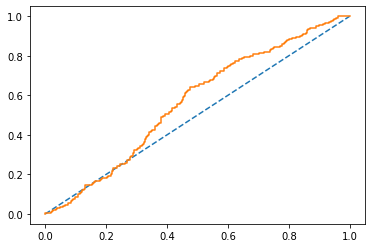

In [368]:
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(train_fpr, train_tpr)

In [369]:
#AUC and ROC for test data
Probs = model.predict_proba(X1_test)
Probs = Probs[:, 1]

auc = roc_auc_score(Y1_test, Probs)
print('AUC: %.3f' %auc)

AUC: 0.627


In [370]:
test_fpr, test_tpr, test_thresholds = roc_curve(Y1_test, Probs)

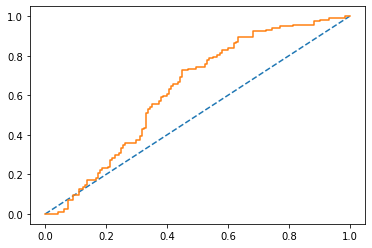

In [371]:
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(test_fpr, test_tpr)